# Preparations

In [3]:
import os,sys
from pathlib import Path
currentdir = Path(os.getcwd())
sys.path.insert(0, os.path.dirname(currentdir.parent))
sys.path.insert(0, os.path.dirname(currentdir))
print(str(sys.path[0:3]))

['C:\\Users\\Roman\\Desktop\\GitBamt\\BAMT', 'C:\\Users\\Roman\\Desktop\\GitBamt', 'C:\\Users\\Roman\\Desktop\\GitBamt\\BAMT\\tutorials']


In [5]:
%%time
%matplotlib inline
# import BAMT.Networks as Nets
import BAMT.Nodes as Nodes

import pandas as pd
import numpy as np
from sklearn import preprocessing
import matplotlib.pyplot as plt

Wall time: 4 ms


## Network based on hackaton data

In [6]:
hack = pd.read_csv(r'../Data/hack_processed_with_rf.csv')
cols = ['Tectonic regime', 'Period', 'Lithology', 'Structural setting', 'Gross','Netpay','Porosity','Permeability', 'Depth']
hack = hack[cols]

encoder = preprocessing.LabelEncoder()
discretizer = preprocessing.KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='quantile')

p = pp.Preprocessor([('encoder', encoder), ('discretizer', discretizer)])
discretized_data, est = p.apply(hack)

In [7]:
bn = Nets.HybridBN(has_logit=True, use_mixture=True) # init BN
info = p.info # mapping of nodes (Dict["types": Dict[node_name: type], "signs": Dict[node_name: sign]])

bn.add_nodes(info)
# DATA PREPROCESSED MUST BE THERE
bn.add_edges(discretized_data, scoring_function=('MI',)) # use mutual information sf implemented in BAMT

bn.get_info()

,name,node_type,data_type,parents,parents_types
0,Tectonic regime,Discrete,disc,[],[]
1,Period,ConditionalLogit,disc,"[Depth, Structural setting, Lithology]","[cont, disc, disc]"
2,Lithology,ConditionalLogit,disc,"[Netpay, Structural setting]","[cont, disc]"
3,Structural setting,Logit,disc,[Permeability],[cont]
4,Gross,MixtureGaussian,cont,[Porosity],[cont]
5,Netpay,MixtureGaussian,cont,[Permeability],[cont]
6,Porosity,ConditionalMixtureGaussian,cont,[Tectonic regime],[disc]
7,Permeability,MixtureGaussian,cont,[Gross],[cont]
8,Depth,MixtureGaussian,cont,[Gross],[cont]


In [11]:
bn.fit_parameters(hack)

## Network based on vk_data

In [20]:
from Utils import GraphUtils as gru
from sklearn import preprocessing as pp
from BAMT.Preprocessors import Preprocessor
from pgmpy.estimators import K2Score

vk_data = pd.read_csv(r"../Data/vk_data.csv")
ROWS = 50
vk_data = vk_data.iloc[:ROWS, :]

nodes_type_mixed = gru.nodes_types(vk_data)
columns = [col for col in vk_data.columns.to_list() if
           nodes_type_mixed[col] in ['disc', 'disc_num']]  # GET ONLY DISCRETE
discrete_data = vk_data[columns]

encoder = pp.LabelEncoder()
discretizer = pp.KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
p = Preprocessor([('encoder', encoder), ('discretizer', discretizer)])


discretized_data, est = p.apply(discrete_data)  # info
info = p.info

bn_d = Nets.DiscreteBN()
bn_d.add_nodes(descriptor=info)
bn_d.add_edges(data=discretized_data, optimizer='HC', scoring_function=('K2', K2Score))

bn_d.get_info()

2022-01-12 15:45:39,410 | INFO     | Preprocessors.py-scan-0082 | No one column is continuous


  0%|          | 0/1000000 [00:00<?, ?it/s]

,name,node_type,data_type,parents,parents_types
0,sex,Discrete,disc_num,"[activities, music, is_gamer, is_driver, has_p...","[disc_num, disc_num, disc_num, disc_num, disc_..."
1,city_id,Discrete,disc_num,[],[]
2,has_high_education,Discrete,disc_num,[instagram],[disc_num]
3,relation,Discrete,disc_num,"[activities, personal_alcohol, personal_politi...","[disc_num, disc_num, disc_num]"
4,num_of_relatives,Discrete,disc_num,"[has_high_education, about_topic, interests]","[disc_num, disc, disc_num]"
5,followers_count,Discrete,disc_num,"[mobile_phone, top1, is_gamer, top4_interes]","[disc_num, disc_num, disc_num, disc]"
6,status,Discrete,disc_num,"[twitter, interests, personal_alcohol, persona...","[disc_num, disc_num, disc_num, disc_num, disc_..."
7,mobile_phone,Discrete,disc_num,"[movies, music, is_gamer, has_pets]","[disc_num, disc_num, disc_num, disc_num]"
8,twitter,Discrete,disc_num,[],[]
9,facebook,Discrete,disc_num,[],[]


In [21]:
bn_d.fit_parameters(data=vk_data)

___

# Nodes

## Summary

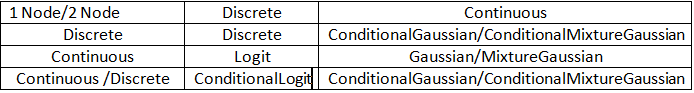

## Discrete Nodes

### Discrete (Parents: Discrete/None)

<p> Discrete Node Distribution contains from Probas Table. Where there are combinations of vals as index , if node has parents, otherwise it's just a probas for each option for random varibale. <p>

In [25]:
bn_d.distributions['personal_alcohol']

{'cprob': [0.98, 0.02], 'vals': ['0', '4']}

In [23]:
bn_d.distributions['relation']

{'cprob': {"['0', '0', '0']": [0.9767441860465116, 0.0, 0.023255813953488372],
  "['0', '0', '1']": [1.0, 0.0, 0.0],
  "['0', '0', '3']": [0.0, 0.0, 1.0],
  "['0', '4', '0']": [0.0, 1.0, 0.0],
  "['0', '4', '1']": [0.3333333333333333,
   0.3333333333333333,
   0.3333333333333333],
  "['0', '4', '3']": [0.3333333333333333,
   0.3333333333333333,
   0.3333333333333333],
  "['1', '0', '0']": [0.0, 0.0, 1.0],
  "['1', '0', '1']": [0.3333333333333333,
   0.3333333333333333,
   0.3333333333333333],
  "['1', '0', '3']": [0.0, 0.0, 1.0],
  "['1', '4', '0']": [0.3333333333333333,
   0.3333333333333333,
   0.3333333333333333],
  "['1', '4', '1']": [0.3333333333333333,
   0.3333333333333333,
   0.3333333333333333],
  "['1', '4', '3']": [0.3333333333333333,
   0.3333333333333333,
   0.3333333333333333]},
 'vals': ['0', '2', '4']}

### Logit (Parents: Continuous)

<p> Data from this type of node provides info about classificator inside. Mean_base - interceptions, mean_scal - coefficients, classes - names of classes. <p>

In [27]:
bn.distributions['Structural setting']

{'mean_base': [-1.7472947034396438,
  -0.5321177190652467,
  1.581619931342328,
  0.7700102346016833,
  0.015689242243953745,
  -0.56996983303352,
  0.7242282470288994,
  0.45528437981917863,
  -0.30962174141942916,
  -0.1116000196453773,
  0.32303553392574,
  -0.5992635523585699],
 'mean_scal': [0.0027683111179876737,
  0.0030083775947359953,
  0.0023520867694301834,
  0.0011523296731840824,
  0.0031698034910685813,
  0.003066458158988246,
  0.003196424864178212,
  0.0027551382212025926,
  0.0019958450966092904,
  -0.028316045971853217,
  0.0018220218454493525,
  0.003029249160177178],
 'classes': ['BACKARC',
  'DELTA',
  'FORELAND',
  'INTRACRATONIC',
  'INVERSION',
  'PASSIVE MARGIN',
  'RIFT',
  'SALT',
  'SUB-SALT',
  'SUB-THRUST',
  'THRUST',
  'WRENCH']}

### Conditional Logit (Parents: Continuous and Discrete)

<p>Data from this type provides info in the following format: <br> 
    condition (combination for discrete parents): {mean_base, mean_scal (info for continuous parents), classes}   <p>

In [28]:
bn.distributions['Period']

{'hybcprob': {"['BACKARC', 'BASEMENT']": {'classes': [],
   'mean_base': [nan],
   'mean_scal': [nan]},
  "['BACKARC', 'CHALK']": {'classes': [],
   'mean_base': [nan],
   'mean_scal': [nan]},
  "['BACKARC', 'CHALKY LIMESTONE']": {'classes': [],
   'mean_base': [nan],
   'mean_scal': [nan]},
  "['BACKARC', 'CHERT']": {'classes': [],
   'mean_base': [nan],
   'mean_scal': [nan]},
  "['BACKARC', 'CONGLOMERATE']": {'classes': [],
   'mean_base': [nan],
   'mean_scal': [nan]},
  "['BACKARC', 'DIATOMITE']": {'classes': [],
   'mean_base': [nan],
   'mean_scal': [nan]},
  "['BACKARC', 'DOLOMITE']": {'classes': [],
   'mean_base': [nan],
   'mean_scal': [nan]},
  "['BACKARC', 'DOLOMITIC LIMESTONE']": {'classes': [],
   'mean_base': [nan],
   'mean_scal': [nan]},
  "['BACKARC', 'GLAUCONITIC SANDSTONE']": {'classes': [],
   'mean_base': [nan],
   'mean_scal': [nan]},
  "['BACKARC', 'LIMESTONE']": {'classes': ['NEOGENE'],
   'mean_base': [0.0],
   'mean_scal': [1.7976931348623157e+308]},
  "['BA

## Continuous Nodes

### Guassian/Mixture Gaussian (Parents: Continuous/None)

Type Consists of info about model inside

In [29]:
bn.distributions['Permeability']

{'mean': [[3125.2399886330186, 204.1994173919433],
  [326.624366370757, 1248.490383591818],
  [93.93151269420937, 63.15308769463731],
  [13.778352333646085, 27.625801026138657],
  [54.746887488195654, 414.38804763321485],
  [868.4699823128414, 99.8222207438981],
  [4.742240118297474, 180.21725211187353]],
 'coef': [0.06583010091840888,
  0.08542177579563118,
  0.22384998436595566,
  0.10296119352885548,
  0.10008028514935675,
  0.23891296913834562,
  0.18294369110344644],
 'covars': [[[4688769.6093719285, -240903.16810160366],
   [-240903.16810160363, 17516.183995572686]],
  [[95173.24334890928, -85264.67042283383],
   [-85264.67042283383, 806930.4069389198]],
  [[5341.916884349414, -1026.9162852063344],
   [-1026.916285206334, 1145.3396801478855]],
  [[124.7101001263418, -7.479411005949194],
   [-7.479411005949195, 94.60555969852675]],
  [[1807.3142090872523, -3740.888262993978],
   [-3740.888262993978, 63937.71573174818]],
  [[419276.82546594803, -16322.090976667827],
   [-16322.0909

### Conditional Gaussian/Conditional Mixture Gaussian

<p>Data from this type provides info in the following format: <br> 
    condition (combination for discrete parents): {mean_base, mean_scal (info for continuous parents), covars}   <p>

In [30]:
bn.distributions['Porosity']

{'hybcprob': {"['COMPRESSION']": {'covars': [[[3.25275981860674]],
    [[10.392536561364675]],
    [[76.80836876617693]],
    [[0.6157290989140718]]],
   'mean': [[19.691396555150707],
    [10.374726828589122],
    [21.16944147457464],
    [13.707472042275397]],
   'coef': [0.16952899540561991,
    0.46633710281667284,
    0.30303447058888106,
    0.06109943118882618]},
  "['EVAPORITE']": {'covars': [[[3.64769282574195e-27]]],
   'mean': [[26.99999999999994]],
   'coef': [1.0]},
  "['EXTENSION']": {'covars': [[[0.020395863380888002]],
    [[0.1705009395229648]],
    [[4.74213037454699]],
    [[4.74213037454699]],
    [[2.3281972134606033]],
    [[1.2621774483536186e-29]],
    [[1.665706339230513]],
    [[2.390084024246938]]],
   'mean': [[20.0447887225998],
    [27.13847109707338],
    [14.502280508598554],
    [14.502280508598554],
    [23.60540225068522],
    [17.999999999999996],
    [2.7595314896449534],
    [31.534589283916592]],
   'coef': [0.09585580784896773,
    0.084056118299